In [ ]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from skimage import filters, measure, morphology
import cv2
import numpy as np
import math
import matplotlib.pyplot as plt

reg_path = "Assignment/data/RESISTORS/"
image_path = reg_path+'RESISTORS-2.png'

In [15]:
def remove_resistor_background(image_path, output_path):
    image = Image.open(image_path)
    # Convert to RGBA
    image = image.convert('RGBA')
    # Convert the image to numpy array
    data = np.array(image)
    white_threshold = 240
    # Create a mask where white is set to True and the rest to False
    white_areas = (data[:,:,0] > white_threshold) \
                  & (data[:,:,1] > white_threshold) \
                  & (data[:,:,2] > white_threshold)
    # Set the alpha channel to 0 for all white areas (making them transparent)
    data[white_areas, -1] = 0
    # Convert the numpy array back to an image
    image_no_white = Image.fromarray(data)
    # Save the image without white background
    image_no_white.save(output_path)

# Set the path for the output image
output_path = 'RESISTORS_no_background.png'

# Call the function to remove the background
remove_resistor_background(image_path, output_path)

# Return the path to the output image
output_path


'RESISTORS_no_background.png'

In [31]:
def transparent_to_pink(input_path, output_path, fill_color=(255, 255, 255)):
    image = Image.open(input_path)
    width, height = image.size

    rows_to_keep = []

    for y in range(height):
        row = [image.getpixel((x, y)) for x in range(width)]  
        new_row = []

        for pixel in row:
            if pixel[3] >= (255 / 2):
                new_row.append(pixel[:3]) 
            else:
                new_row.append(fill_color) 

        if any(pixel[3] >= (255 / 2) for pixel in row):
            rows_to_keep.append(new_row)

    new_height = len(rows_to_keep)
    new_image = Image.new('RGB', (width, new_height))

    for y, row in enumerate(rows_to_keep):
        for x, pixel in enumerate(row):
            new_image.putpixel((x, y), pixel)

    new_image.save(output_path, 'PNG')

In [32]:
transparent_to_pink("RESISTORS_no_background.png", "RESISTORS-2_pinkbg.png", fill_color=(255, 192, 203))

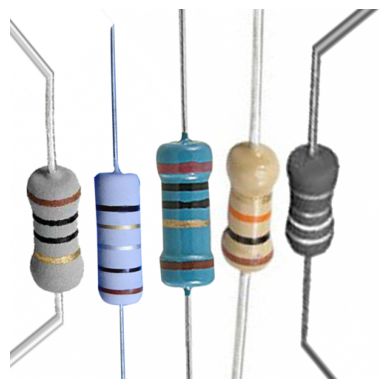

In [43]:
# Rotate
# Full code for rotating image to make resistors vertical based on the lines detected using Hough Transform


image_path = 'RESISTORS-2.png'
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Function to calculate the angle of the line
def calculate_angle(line):
    x1, y1, x2, y2 = line[0]
    return math.degrees(math.atan2(y2 - y1, x2 - x1))

# Convert the image to grayscale
gray_image = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2GRAY)

# Use Canny edge detection to find edges in the image
edges = cv2.Canny(gray_image, 50, 150, apertureSize=3)

# Use HoughLinesP to find lines in the edge detected image
lines = cv2.HoughLinesP(edges, 1, np.pi / 180, threshold=80, minLineLength=100, maxLineGap=10)

# Calculate the angles of the lines and average them
angles = [calculate_angle(line) for line in lines]

# Calculate the average angle, adjusting it to make the line vertical instead of horizontal
average_angle = np.mean(angles) if len(angles) > 0 else 0
vertical_angle = average_angle - 90  # Adjust angle to make the line vertical

# Rotate the image to make the lines vertical
(h, w) = image_rgb.shape[:2]
center = (w // 2, h // 2)
M = cv2.getRotationMatrix2D(center, vertical_angle, 1.0)
rotated_image = cv2.warpAffine(image_rgb, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)
output_path = 'rotated_resistor.png'
rotated_image_bgr = cv2.cvtColor(rotated_image, cv2.COLOR_RGB2BGR)
cv2.imwrite(output_path, rotated_image_bgr)

# Display the rotated image
plt.imshow(rotated_image)
plt.axis('off')
plt.show()

# The code provided here will output the rotated image where the lines are made vertical.
# Please replace 'image_path' with the actual path to your image when you run this code.


In [44]:
# Define a function to separate each resistor
def separate_resistors(image):
    width, height = image.size
    pixels = image.load()
    gap_threshold = height * 0.9
    white_threshold = 250  
    gap_indices = []
    for x in range(width):
        white_count = sum(1 for y in range(height) if pixels[x, y] >= (white_threshold, white_threshold, white_threshold))
        if white_count > gap_threshold:
            gap_indices.append(x)
    resistor_bounds = []
    start_x = 0
    for gap_x in gap_indices:
        end_x = gap_x
        if end_x - start_x > 1:  
            resistor_bounds.append((start_x, 0, end_x, height))
        start_x = gap_x + 1
    if start_x < width:
        resistor_bounds.append((start_x, 0, width, height))
    resistor_images = [image.crop(bounds) for bounds in resistor_bounds]
    return resistor_images

In [45]:
img = Image.open("rotated_resistor.png")
resistor_imgs = separate_resistors(img)
# Save separated resistor photos
separated_img_paths = []
for i, resistor_img in enumerate(resistor_imgs):
    path = f'resistor_{i}.png'
    resistor_img.save(path)
    separated_img_paths.append(path)
separated_img_paths

['resistor_0.png',
 'resistor_1.png',
 'resistor_2.png',
 'resistor_3.png',
 'resistor_4.png']

In [48]:
def remove_resistor_backgroud(image_path, output_path):
    image = Image.open(image_path)
    # Convert to RGBA
    image = image.convert('RGBA')
    # Convert the image to numpy array
    data = np.array(image)
    white_threshold = 240
    # Create a mask where white is set to True and the rest to False
    white_areas = (data[:,:,0] > white_threshold) \
                  & (data[:,:,1] > white_threshold) \
                  & (data[:,:,2] > white_threshold)
    # Set the alpha channel to 0 for all white areas (making them transparent)
    data[white_areas, -1] = 0
    # Convert the numpy array back to an image
    image_no_white = Image.fromarray(data)
    # Save the image without white background
    image_no_white.save(output_path)

In [49]:
for i in range(len(resistor_imgs)):
    image_path = f'resistor_{i}.png'
    output_path = f'RESISTORS_{i}_no_white.png'
    remove_resistor_backgroud(image_path, output_path)

In [50]:
def transparent_to_pink(input_path, output_path, fill_color=(255, 255, 255)):
    image = Image.open(input_path)
    width, height = image.size

    rows_to_keep = []

    for y in range(height):
        row = [image.getpixel((x, y)) for x in range(width)]  
        new_row = []

        for pixel in row:
            if pixel[3] >= (255 / 2):
                new_row.append(pixel[:3]) 
            else:
                new_row.append(fill_color) 

        if any(pixel[3] >= (255 / 2) for pixel in row):
            rows_to_keep.append(new_row)

    new_height = len(rows_to_keep)
    new_image = Image.new('RGB', (width, new_height))

    for y, row in enumerate(rows_to_keep):
        for x, pixel in enumerate(row):
            new_image.putpixel((x, y), pixel)

    new_image.save(output_path, 'JPEG')



In [55]:
def remove_wire(input_path, output_path, target_color=(255, 192, 203), threshold=0.5):
    # Load the original image
    image = Image.open(input_path)
    width, height = image.size
    rows_to_keep = []
    for y in range(height):
        row = [image.getpixel((x, y)) for x in range(width)]  # Get entire row of pixels
        target_color_count = sum(1 for pixel in row if pixel[:3] == target_color)

        # Keep the row if target color pixels are less than the threshold percentage of the row
        if target_color_count < width * threshold:
            rows_to_keep.append(row)

    new_height = len(rows_to_keep)
    new_image = Image.new('RGB', (width, new_height))  # Use 'RGB' mode as JPEG does not support transparency

    for y, row in enumerate(rows_to_keep):
        for x, pixel in enumerate(row):
            new_image.putpixel((x, y), (pixel[0], pixel[1], pixel[2]))

    new_image.save(output_path, 'JPEG')

In [56]:
for i in range(len(resistor_imgs)):
    image_path = f'RESISTORS_{i}_no_white.png'
    output_path = f'RESISTORS_{i}_transparent_horizontal.jpg'
    transparent_to_pink(image_path, output_path, fill_color=(255, 192, 203))
    remove_wire(output_path, output_path,(255, 192, 203), 0.2)

SyntaxError: positional argument follows keyword argument (2741827433.py, line 5)

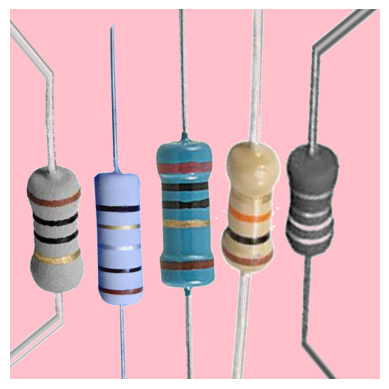